C:\Users\manmi\AppData\Local\Temp\ipykernel_103388\3660234414.py:28: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers,start = '2020-01-01', end = '2024-12-31')["Close"]
[*********************100%***********************]  5 of 5 completed


Ticker            AAPL        AMZN        MSFT         QQQ        ^GSPC
Date                                                                   
2020-01-02   72.620850   94.900497  153.042313  209.091064  3257.850098
2020-01-03   71.914818   93.748497  151.136642  207.175812  3234.850098
2020-01-06   72.487846   95.143997  151.527298  208.510712  3246.280029
2020-01-07   72.146919   95.343002  150.145706  208.481674  3237.179932
2020-01-08   73.307518   94.598503  152.537308  210.048660  3253.050049
...                ...         ...         ...         ...          ...
2024-12-23  254.655716  225.059998  433.583038  521.505737  5974.069824
2024-12-24  257.578674  229.050003  437.647369  528.577209  6040.040039
2024-12-26  258.396667  227.050003  436.432068  528.218140  6037.589844
2024-12-27  254.974930  223.750000  428.881104  521.196533  5970.839844
2024-12-30  251.593079  221.300003  423.202911  514.264648  5906.939941

[1257 rows x 5 columns]
Ticker            AAPL        AMZN     

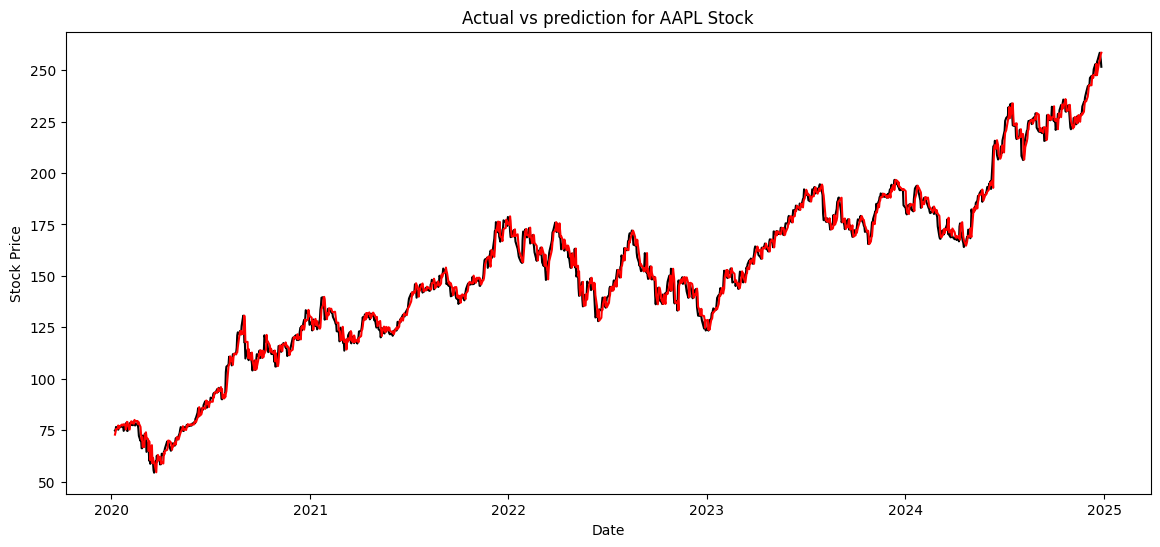

Ticker            AAPL   AAPL(t-1)   ^GSPC(t-1)
Date                                           
2020-01-08   73.307518   72.146919  3237.179932
2020-01-09   74.864632   73.307518  3253.050049
2020-01-10   75.033859   74.864632  3274.699951
2020-01-13   76.636925   75.033859  3265.350098
2020-01-14   75.602058   76.636925  3288.129883
...                ...         ...          ...
2024-12-20  253.877594  249.188889  5867.080078
2024-12-23  254.655716  253.877594  5930.850098
2024-12-24  257.578674  254.655716  5974.069824
2024-12-26  258.396667  257.578674  6040.040039
2024-12-27  254.974930  258.396667  6037.589844

[1252 rows x 3 columns]


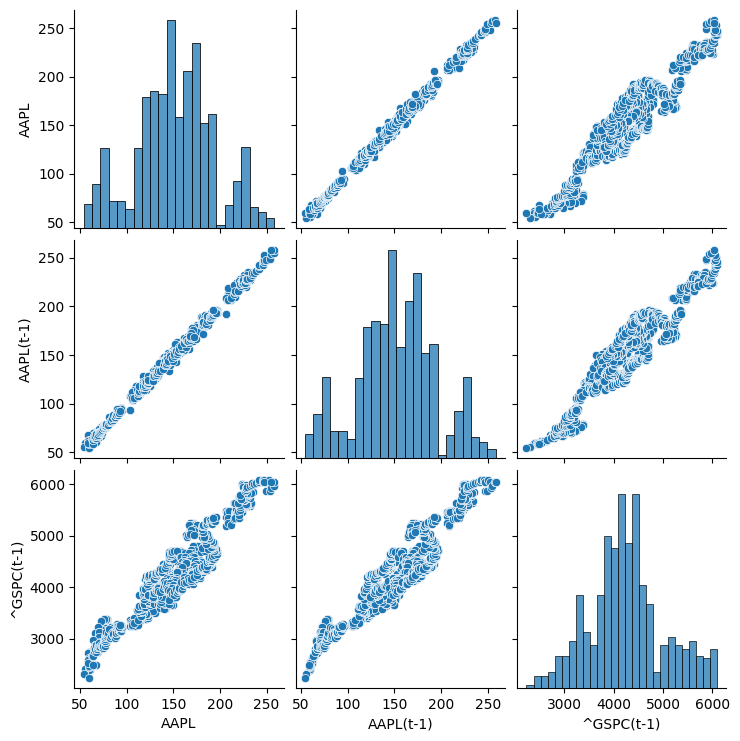

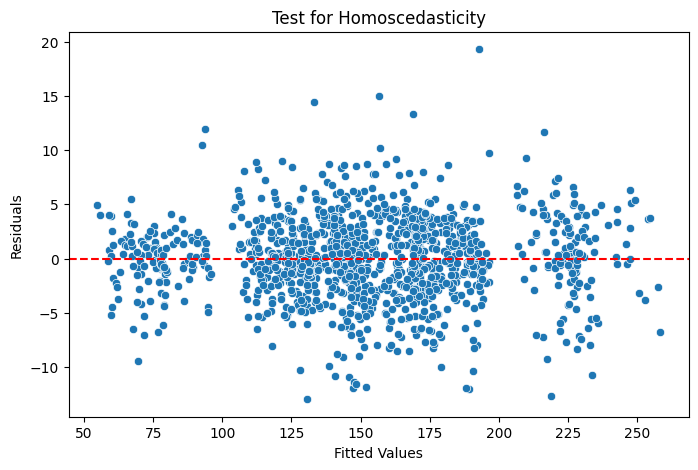

     Features       VIF
1   AAPL(t-1)  7.634911
2  ^GSPC(t-1)  7.634911


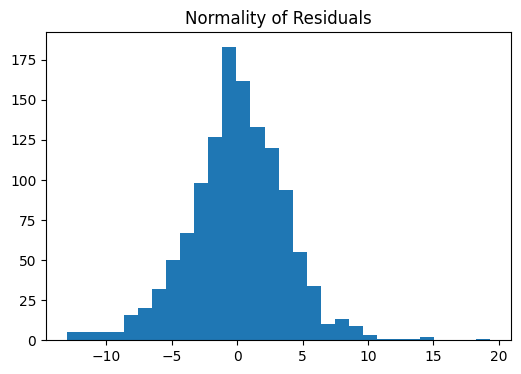

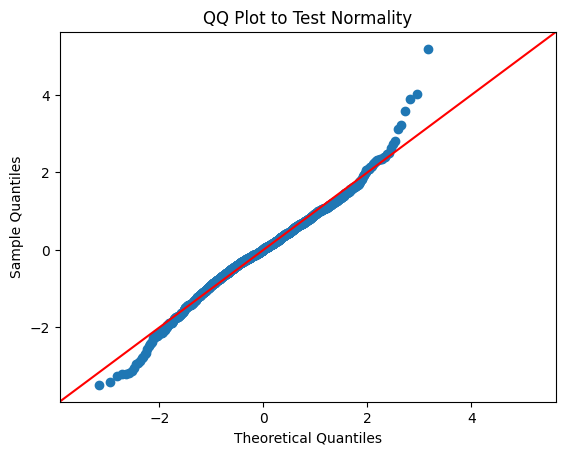

1.0410068082317694


C:\Users\manmi\AppData\Local\Temp\ipykernel_103388\3660234414.py:190: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2025-01-01', end = '2025-07-29')["Close"]
[*********************100%***********************]  2 of 2 completed


Ticker            AAPL        ^GSPC
Date                               
2025-01-02  243.263199  5868.549805
2025-01-03  242.774368  5942.470215
2025-01-06  244.410416  5975.379883
2025-01-07  241.627136  5909.029785
2025-01-08  242.115952  5918.250000
...                ...          ...
2025-07-22  214.399994  6309.620117
2025-07-23  214.149994  6358.910156
2025-07-24  213.759995  6363.350098
2025-07-25  213.880005  6388.640137
2025-07-28  214.050003  6389.770020

[141 rows x 2 columns]
Ticker            AAPL        ^GSPC   AAPL(t-1)   ^GSPC(t-1)
Date                                                        
2025-01-03  242.774368  5942.470215  243.263199  5868.549805
2025-01-06  244.410416  5975.379883  242.774368  5942.470215
2025-01-07  241.627136  5909.029785  244.410416  5975.379883
2025-01-08  242.115952  5918.250000  241.627136  5909.029785
2025-01-10  236.280045  5827.040039  242.115952  5918.250000
Ticker       AAPL(t-1)   ^GSPC(t-1)
Date                               
2025-01-0

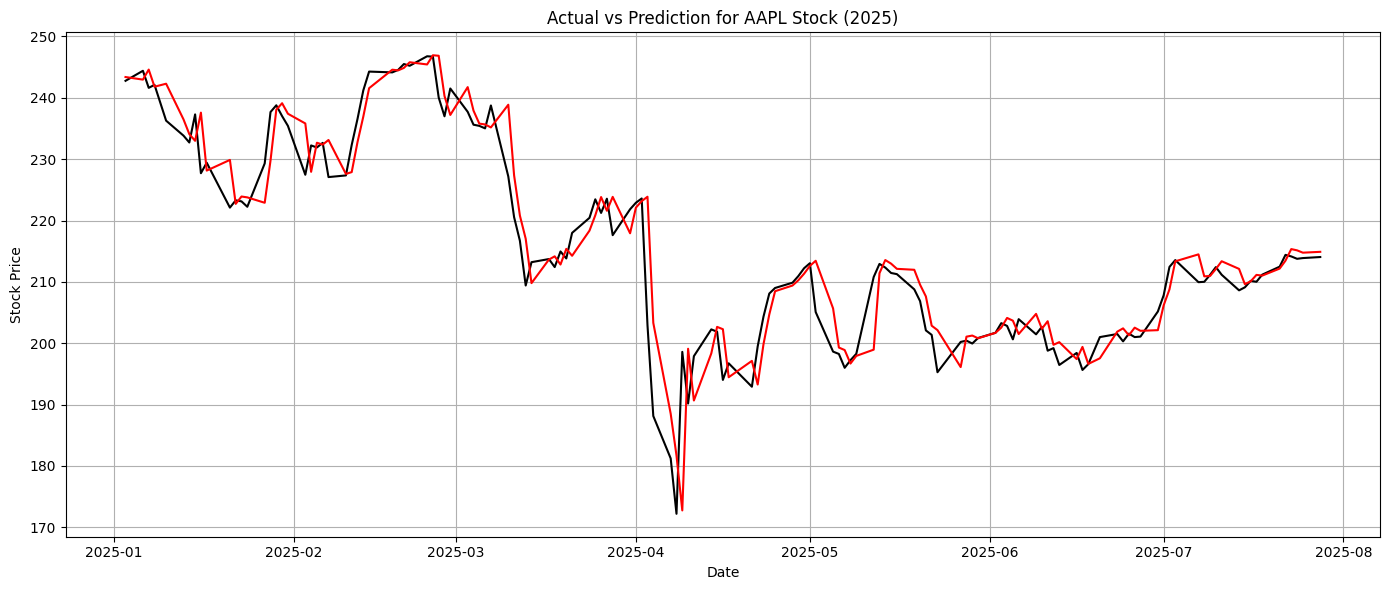

R squared =  0.9074352207931307
mse =  24.123529013343006
rmse =  4.911570931315459


In [1]:
#Quant Project 2: Linear Regression Modeling for Predicting the Stock price and testing all of the assumptions

#Step 1: Download data from yahoo Finance
#Step 2: Some Feature Engineering (to buid new feature) - Technical Indicators
#Step 3: Run the Linear Regression Model
#Step 4: Check How The Model is Performed (Actual Vs Predicted)
#Step 5: Test All of the Assumptions
#Step 6: Check the Prediction

#In this specifc model, we are aiming to predict AAPL's price for the next day

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score





tickers = ["AAPL", "AMZN","MSFT",'QQQ','^GSPC']
df = yf.download(tickers,start = '2020-01-01', end = '2024-12-31')["Close"]
print(df)

#Step 2: Feature Engineering
#Note: To Predict AAPL Stock Price, We have to Consider yesterday's price (all stocks)
#The Market is not open yet so we do not know today's price

#Get previous day prices using a for loop
#Considering Yesterday's Values

for i in ["AAPL", "AMZN","MSFT",'QQQ','^GSPC']:

    df[i+'(t-1)'] = df[i].shift(1)

print(df)

#Moving Average (MA): The average moves, technical indicator - helps understand the short term trend, Can Continue to Add more indicators, can have dozens of additional features

for i in ["AAPL", "AMZN","MSFT",'QQQ','^GSPC']:
    df[i+'_MA_5'] = df[i].rolling(window = 5).mean()

print(df)

#Set the Y variable - the prediction of the stock price, next day value found by .shift(-1)
#idea: Feed in the previous day stock market price values and the Moving Averages to predict AAPL's price today
df['Target'] = df['AAPL'].shift(-1)
df = df.dropna()



#Set X & Y Variables For The Linear Regression Model - Ordinary least squares
x = df[['AAPL(t-1)', '^GSPC(t-1)' ]] #Removed AAPL MA_5 To meet the linear collinearity condition
y = df[['Target']]

print(x)

x_const = sm.add_constant(x) #For the intercept term, Y = Intercept + B1*X1 + b2*X2....

#train the model first to build a linear regression model
model = sm.OLS(y,x_const).fit()

print(model.summary())


df_train_predict = pd.DataFrame()
df_train_predict['Actual'] = df['Target']
df_train_predict['Predicted'] = model.predict(x_const)
print(df_train_predict)

#Plot between Actual VS Predicted Value

plt.figure(figsize = (14,6))
plt.plot(df_train_predict.index, df_train_predict['Actual'], label = 'Actual', color = 'black')
plt.plot(df_train_predict.index, df_train_predict['Predicted'], label = 'Predicted', color = 'red')

plt.title("Actual vs prediction for AAPL Stock")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.show()

# We still need to test the LR Assumptioms
#We need to check how the model uis performing on test data

#Linear Regression: (Given the dataset)
#Step 1: Trained the Model
#Step 2: Test the Model

#Trained and Tested the model on the same thing


#Assumptions of linear regression


#1) Linearity between dependent and independent variable


df = df[["AAPL","AAPL(t-1)","^GSPC(t-1)",]]
print(df)

## different scatterplots or just use seaborn



print(sns.pairplot(df))

#Homoscedasticity: Fitting the residual with the fitted value

residual = model.resid #Actual - Predicted
fitted = model.fittedvalues #Predicted Y Values


plt.figure(figsize = (8,5))
sns.scatterplot(x = fitted, y = residual)
plt.axhline(0, color = 'red', linestyle = '--')
plt.title("Test for Homoscedasticity")
plt.xlabel('Fitted Values')
plt.ylabel("Residuals")
plt.show()

#Since it has a tube like structure it is homoscedastic (constant variance, independent of each other)
#If it had a funnel like structure we would say Hetroscedastic


#3) Multicollinearlity => VIF (Vairance Inflation Factor) => Only used for independent vairables

#Rule of Thumb for Multicollinearity
#VIF <1 => No Multicollinearity 
#VIF < 10 => Moderate Multicollinearity
#VIF > 10 => Strong Multicollinearity




vif = pd.DataFrame()
vif["Features"] = x_const.columns
vif["VIF"] = [variance_inflation_factor(x_const.values, i) for i in range(x_const.shape[1])]
vif = vif[1:]
print(vif)


#4) Assumptiom: Normality of Residual => 1) Visual Test Using A Histogram or QQ Plot

plt.figure(figsize = (6,4))
plt.hist(residual, bins = 30)
plt.title("Normality of Residuals")
plt.show()

#QQ Plot is easier to tell if it is a normal distribution, used for testing the normailty of residuals



sm.qqplot(residual, line = "45", fit = True)
plt.title("QQ Plot to Test Normality")
plt.show()

#Test 5: test for Auto Correlation of Residuals: Durbin Watson Test



#Just rmbr the function of your code and then chatgpt and google to help write the specifc functions and syntax, just need to know what you need to do and why

dw = durbin_watson(residual)
print(dw) #P-value, Hypothesis Testing

#p value < 0.05 => Autocorrelation b/W residual is there
# p value > 0.05 => Automcorrelation between resdiual is not there


#All 5 Conditions Have been met in this linear regression model

#Linearity
#Homescedascitcity 
#VIF
#Normality of Residuals
#Auto Correlation of Residual

#Let's Predict the Stock Price For 2025, first 3 months => This is the test now that we have trained & validated our model

#Step 1: Download the data from Yahoo Finance

tickers = ['AAPL', '^GSPC']

df = yf.download(tickers, start = '2025-01-01', end = '2025-07-29')["Close"]
print(df)


#Step 2: Perform Feature/Data Engineering

df["AAPL(t-1)"] = df['AAPL'].shift(1)
df["^GSPC(t-1)"] = df["^GSPC"].shift(1)
df = df.dropna()
print(df.head())

#Step 3: Do the Prediction Piece

x_test  = df[["AAPL(t-1)","^GSPC(t-1)"]]
print(x_test)
x_test = sm.add_constant(x_test)

df_result = pd.DataFrame()
df_result["Actual"] = df["AAPL"]
df_result["Predicted"] = model.predict(x_test)
print(df_result.head())

#Plot between Actual vs Predicted Value



plt.figure(figsize = (14,6))
plt.plot(df_result.index, df_result["Actual"], label ="Actual",color = "black")
plt.plot(df_result.index, df_result['Predicted'], label = 'Predicted',color = 'red')
plt.title("Actual vs Prediction for AAPL Stock (2025)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()

#Conclusion: It is a decent model but not 100% accurate

#Lesson: Stock data have many non linearities
#Its tough to try and use just a simple linear regression modle just to capture the non linear effect
#That's why in the industry oit is commeon to use ML Models Which better capture the non linearities of stock price data



#Calculating the Risk Metrics

#Calculate the rmse and rse

#rmse = root mean square error +> Sq root(Avg((A-P)^2))
#mse = mean square error Avg((A-P)^2)



#Calculate mse



r2 = r2_score(df_result["Actual"],df_result["Predicted"])
print("R squared = ", r2)

mse = mean_squared_error(df_result["Actual"],df_result["Predicted"])
print("mse = ", mse)

rmse = np.sqrt(mse)
print("rmse = ", rmse)

#Interpreting the Summary

#R-squared -> 0.993, Your model explains 99.3% of the variation in the stock price, shows that it is a pretty good model, higher the btter the model
#Adjusted R-squared -> at the end we only had two variables to predict y, lets say two more, r squared may increase but adjusted r square will likely decrease, it penalizes insignifcant variables, but r squared does not penalize it
#Number of Observations -> How many datapoints the model was trained on
#Df model -> how many independent variables there are in the model
#Df  residuals = Number of observations - Df model - 1
#P-value => less that 0.05, it is signifcant if it is greater than 0.05 it is insignifucant, thus drop the vairable
#Coefficient -> 0.46682 for apple, interpretation, if aaple price yesterday increases by 1 unit then the target vaiable will increase by 0.4682 units keeping all of the other variables constant (ceteris paribus)
#Durbin Watson -> p-value is greater than or less that 0.05, it tells you about about autocoorelation between the residuals
#Why to keep p-value as 0.05, 95% confidence interval, , 0.05 is signifccant, greater than 0.05 insignificant
#Standard Error -> Measure of How precise your coefficient estimate is, if you have lower std error, your coefficient estimate is relaiable and vice versa
#Helps to calulate the t-statistics bar -> Coefficent/standard error, high absolute t statisticas
#Aim is > 2 or < -2, if it statistic is high then the variable is statistically significant





